In [1]:
import xarray as xr
import numpy as np

import matplotlib.pyplot as plt

Matplotlib created a temporary config/cache directory at /jobfs/116601172.gadi-pbs/matplotlib-tqrf_3e5 because the default path (/home/563/ab2313/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
Matplotlib is building the font cache; this may take a moment.


In [16]:
xr.set_options(display_expand_attrs=False)

In [2]:
PRECIP_PATH = '/g/data/w40/ab2313/PhD/time_of_emergence/GPCC/precip.mon.total.v7.nc'

In [31]:
gcpp_raw_ds = xr.open_dataset(PRECIP_PATH, chunks={'time':-1, 'lat':120, 'lon':180}).precip#.compute()

In [32]:
gcpp_raw_ds

<xarray.DataArray 'precip' (time: 1356, lat: 360, lon: 720)>
dask.array<open_dataset-cd619b8cb3bc69ea8e51ef8efbcb8916precip, shape=(1356, 360, 720), dtype=float32, chunksize=(1356, 120, 180), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 1901-01-01 1901-02-01 ... 2013-12-01
Attributes: (10)

In [60]:
gcpp_ds = gcpp_raw_ds.resample(time='Y').sum().compute()

KeyboardInterrupt: 

In [ ]:
gcpp_ds

In [ ]:
gcpp_ds = gcpp_ds.where(np.isfinite(gcpp_raw_ds.isel(time=0).drop('time')))

In [ ]:
gcpp_ds

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
gcpp_ds.isel(time=50).plot()

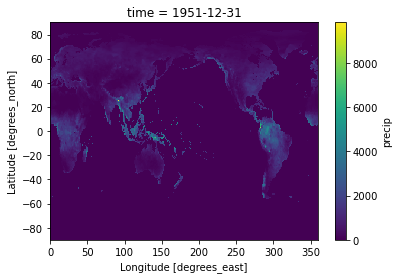

In [34]:
gcpp_ds.isel(time=50).plot()